In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [3]:
emails = pd.read_csv('/home/user/Documents/python/emails.csv')
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
emails.notnull().value_counts()

text  spam
True  True    5728
dtype: int64

<AxesSubplot: >

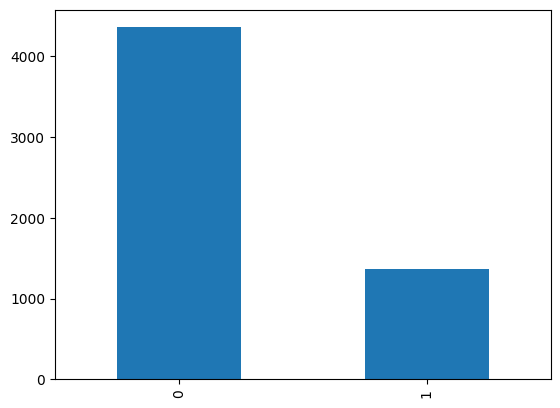

In [6]:
emails.spam.value_counts().plot.bar()

#### processing text

In [7]:
emails.text = emails.text.str.lower()

In [8]:
# remove punctuation
import string

def remove_punc(text):
    return text.translate(str.maketrans('','',string.punctuation))

In [9]:
emails.text = emails.text.apply(remove_punc)

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
stopword = set(stopwords.words('english'))
stopword.add('subject')

def remove_stopwords(text):
    return (' '.join([word for word in text.split(' ') if word not in stopword ]))

In [12]:
emails.text = emails.text.apply(remove_stopwords)

In [13]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])

In [14]:
emails.text.apply(lemmatize)

0       naturally irresistible corporate identity  lt ...
1       stock trading gunslinger  fanny merrill muzo c...
2       unbelievable new home made easy  im wanting sh...
3       4 color printing special  request additional i...
4       money  get software cd   software compatibilit...
                              ...                        
5723     research development charge gpg              ...
5724     receipt visit  jim   thanks invitation visit ...
5725     enron case study update  wow  day   super  th...
5726     interest  david   please  call shirley crensh...
5727    news  aurora 5  2 update  aurora version 5  2 ...
Name: text, Length: 5728, dtype: object

In [15]:
x = emails.text
y = emails.spam

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(x_train, y_train)


MultinomialNB()

In [31]:
y_pred_train = model.predict(x_train)

In [32]:
from sklearn.metrics import accuracy_score

In [37]:
train_score = accuracy_score(y_train, y_pred_train)
train_score

0.9398852581691195

In [38]:
y_pred_test = model.predict(x_test)
test_score = accuracy_score(y_test,y_pred_test)
test_score

0.9057591623036649

In [39]:
# hyperparameter tunning

In [47]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.0000001,0.000001,0.00001,0.0001,0.001,0.001,0.01,0.1,1,1.1,1.5,1.8,2,3,4,5,6,7,10]}
gsmodel = GridSearchCV(estimator=MultinomialNB(),
                      param_grid=params,
                      scoring = accuracy_score)

gsmodel.fit(x_train,y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/user/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3179, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3105, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan

/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/user/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3179, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3105, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan

/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/user/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3179, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3105, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan

/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/user/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3179, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3105, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/home/user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.001,
                                   0.01, 0.1, 1, 1.1, 1.5, 1.8, 2, 3, 4, 5, 6,
                                   7, 10]},
             scoring=<function accuracy_score at 0x7f5798553400>)

In [48]:
gsmodel.best_params_

{'alpha': 1e-07}

In [50]:
model1 = MultinomialNB(alpha=1e-07)

In [52]:
model1.fit(x_train,y_train)
y_pred_train1 = model1.predict(x_train)
train_score1 = accuracy_score(y_train,y_pred_train1)
train_score1

1.0